# Titanic - Machine Learning from Disaster

https://www.kaggle.com/competitions/titanic/data

This is the legendary Titanic ML competition ‚Äì the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered ‚Äúunsinkable‚Äù RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren‚Äôt enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: ‚Äúwhat sorts of people were more likely to survive?‚Äù using passenger data (ie name, age, gender, socio-economic class, etc).


# Index

1. Import necessary libraries
   - pandas for data manipulation
   - numpy for numerical computations
   - matplotlib and seaborn for data visualization
   - scikit-learn for machine learning

2. Load the data
   - Read train.csv and test.csv using pandas read_csv function
   - Inspect the datasets using .head(), .info() and .describe() functions

3. Perform exploratory data analysis (EDA)
   - Explore the relationship between survival and various features like age, gender, and class
   - Use histograms, bar plots, and box plots to visualize the distributions and correlations

4. Data preprocessing
   - Handle missing values by imputing or dropping records
   - Convert categorical variables to numerical using one-hot encoding or label encoding
   - Scale and normalize numerical features if necessary

5. Feature engineering
   - Create new features by combining existing ones, e.g., family size from sibsp and parch
   - Group or bin continuous variables, e.g., age groups or fare ranges
   - Select relevant features based on feature importance or correlation with the target variable

6. Split the training dataset
   - Split the training dataset into training and validation sets using train_test_split from scikit-learn

7. Train machine learning models
   - Choose one or more suitable machine learning algorithms, e.g., logistic regression, random forest, support vector machine, etc.
   - Train the selected models on the training set
   - Evaluate the performance of the models on the validation set using metrics like accuracy, precision, recall, and F1-score

8. Model selection and tuning
   - Compare the performance of different models
   - Perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV

9. Predict on the test dataset
   - Apply the same preprocessing and feature engineering steps to the test dataset
   - Use the best performing and tuned model to make predictions on the test dataset

10. Create submission file
   - Combine the test dataset passenger IDs with the predicted survival values into a pandas DataFrame
   - Export the DataFrame as a CSV file using pandas to_csv function

11. Submit the predictions
   - Upload the submission CSV file to the Kaggle competition

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dataset Description
## Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the ‚Äúground truth‚Äù) for each passenger. Your model will be based on ‚Äúfeatures‚Äù like passengers‚Äô gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

| Variable | Definition                         | Key                                                 |
| -------- | ---------------------------------- | --------------------------------------------------- |
| survival | Survival                           | 0 = No, 1 = Yes                                     |
| pclass   | Ticket class                       | 1 = 1st, 2 = 2nd, 3 = 3rd                            |
| sex      | Sex                                |                                                     |
| age      | Age in years                       |                                                     |
| sibsp    | # of siblings / spouses aboard the Titanic    |                                          |
| parch    | # of parents / children aboard the Titanic    |                                          |
| ticket   | Ticket number                      |                                                     |
| fare     | Passenger fare                     |                                                     |
| cabin    | Cabin number                       |                                                     |
| embarked | Port of Embarkation                | C = Cherbourg, Q = Queenstown, S = Southampton      |



### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fianc√©s were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# Data Analysis 

## Load the data
Read train.csv and test.csv using pandas read_csv function
Inspect the datasets using .head(), .info() and .describe() functions

In [2]:
train_df = pd.read_csv('train.csv') # Load train.csv
train_df.head()  # first 5 rows of the dataset

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train_df.info()  # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe() # Inspect the dataset

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### Conclusion
* The columns PassangerID and Name are not relevant for our goal. 
* A 0.39 % of the passager survived.

## Perform exploratory data analysis (EDA)
Explore the relationship between survival and various features like age, gender, and class
Use histograms, bar plots, and box plots to visualize the distributions and correlations

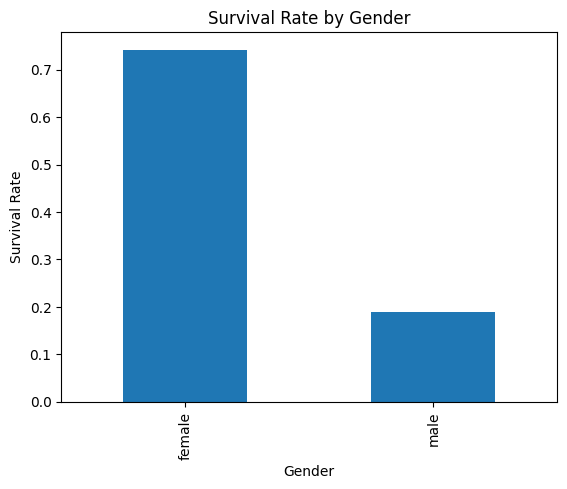

In [5]:
# a. Explore the relationship between survival and gender
gender_survival = train_df.groupby("Sex")["Survived"].mean()
gender_survival.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()

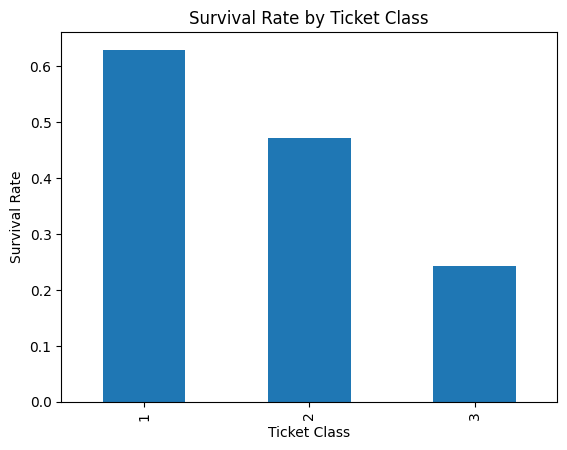

In [6]:
# b. Explore the relationship between survival and ticket class (pclass)
pclass_survival = train_df.groupby("Pclass")["Survived"].mean()
pclass_survival.plot(kind="bar")
plt.xlabel("Ticket Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Ticket Class")
plt.show()

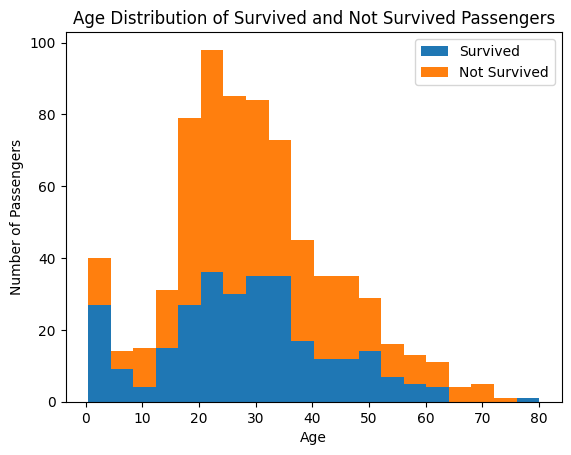

In [7]:
# c. Explore the relationship between survival and age
survived = train_df[train_df["Survived"] == 1]
not_survived = train_df[train_df["Survived"] == 0]

plt.hist([survived["Age"], not_survived["Age"]], bins=20, label=["Survived", "Not Survived"], stacked=True)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Survived and Not Survived Passengers")
plt.legend()
plt.show()

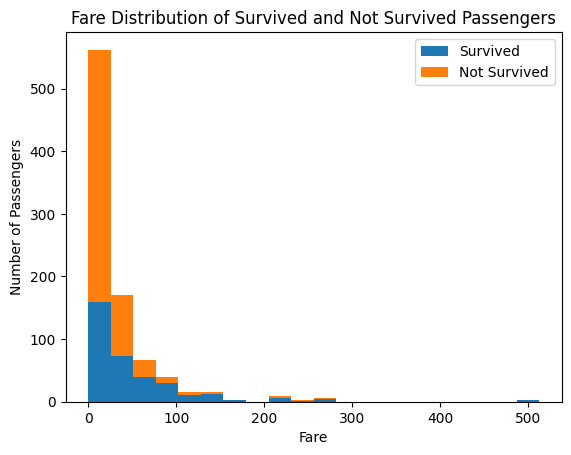

In [8]:
# d. Explore the relationship between survival and fare
plt.hist([survived["Fare"], not_survived["Fare"]], bins=20, label=["Survived", "Not Survived"], stacked=True)
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.title("Fare Distribution of Survived and Not Survived Passengers")
plt.legend()
plt.show()

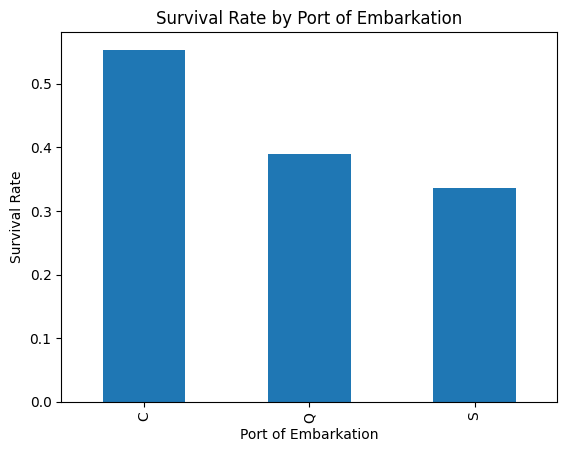

In [9]:
# e. Explore the relationship between survival and port of embarkation (embarked)
embarked_survival = train_df.groupby("Embarked")["Survived"].mean()
embarked_survival.plot(kind="bar")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Port of Embarkation")
plt.show()

### Correlation Table

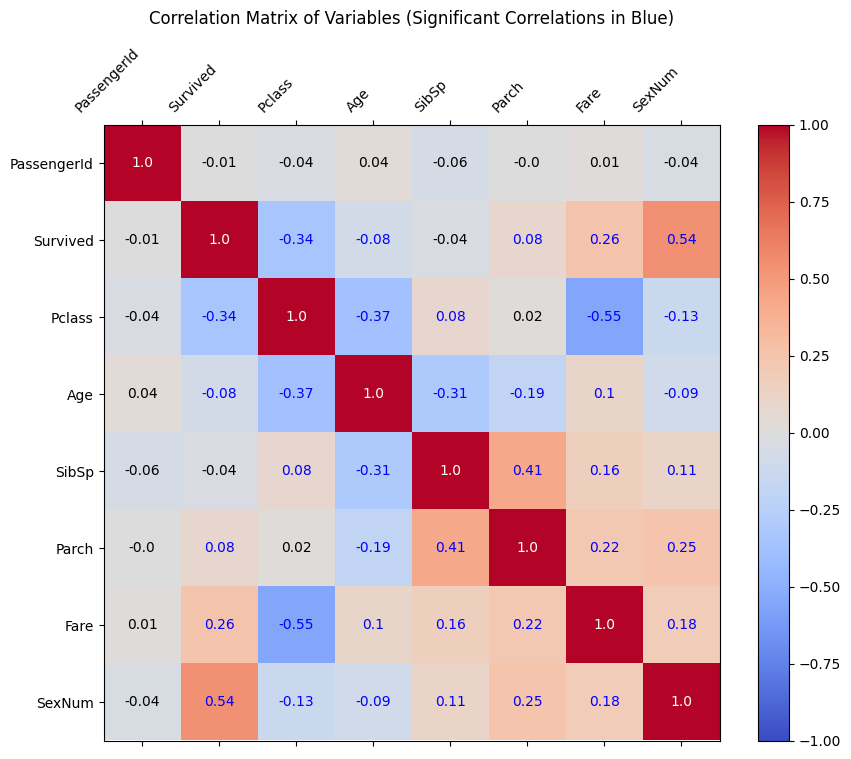

In [10]:
# Convert the 'Sex' column to numerical format using label encoding
train_df['SexNum'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Set the significance level
alpha = 0.05  # -> |ùëü|‚â• 2/‚àön

# Calculate the number of samples
n = len(train_df)

# Plot the correlation matrix using a heatmap in matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add labels and tick marks
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add correlation values inside each square
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        # Calculate the t-statistic and p-value
        r = correlation_matrix.iloc[i, j]
        if r != 1:
          t_statistic = r * np.sqrt((n - 2) / (1 - r ** 2))
          p_value = t.sf(np.abs(t_statistic), n - 2) * 2
          
          # Check if the p-value is below the chosen significance level
          if p_value < alpha and i != j:
              # Use a different color for significant correlations
              text_color = 'blue'
          else:
              text_color = 'black'
        
        else:
          text_color = 'white'

        # Add the correlation value with the appropriate color
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color=text_color)

# Add a colorbar
fig.colorbar(cax)

# Set the title
plt.title("Correlation Matrix of Variables (Significant Correlations in Blue)", y=1.15)

plt.show()

### Data preprocessing
Handle missing values by imputing or dropping records
Convert categorical variables to numerical using one-hot encoding or label encoding
Scale and normalize numerical features if necessary


In [11]:
# Encode 'Ticket', 'Cabin', and 'Embarked' as numerical values
label_encoder = LabelEncoder()
for col in ['Ticket', 'Cabin', 'Embarked']:
    train_df[col+'Num'] = label_encoder.fit_transform(train_df[col].astype(str))

# Handle missing values in 'Age', 'Fare', 'Cabin_Num' and 'Embarked_Num' columns
imputer = SimpleImputer(strategy='median')
train_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']] = imputer.fit_transform(train_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']])

# Scale and normalize numerical features (optional, depending on the chosen ML model)
scaler = MinMaxScaler()
train_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']] = scaler.fit_transform(train_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']])

# Drop original text columns and irrelevant columns like 'PassengerId' and 'Name'
train_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [12]:
train_df.head() # Inspect the preprocessed data

Survived  Pclass       Age  SibSp  Parch      Fare  SexNum  TicketNum  \
0         0       3  0.271174      1      0  0.014151       0   0.769118   
1         1       1  0.472229      1      0  0.139136       1   0.876471   
2         1       3  0.321438      0      0  0.015469       1   0.983824   
3         1       1  0.434531      1      0  0.103644       1   0.072059   
4         0       3  0.434531      0      0  0.015713       0   0.694118   

   CabinNum  EmbarkedNum  
0   1.00000     0.666667  
1   0.55102     0.000000  
2   1.00000     0.666667  
3   0.37415     0.666667  
4   1.00000     0.666667

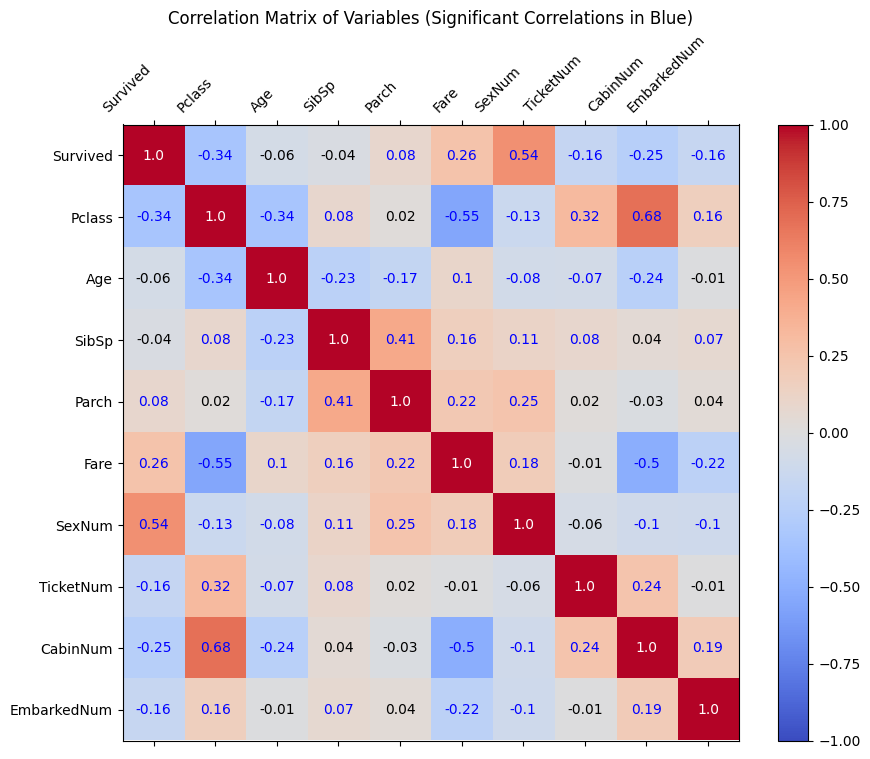

In [13]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Set the significance level
alpha = 0.05  # -> |ùëü|‚â• 2/‚àön

# Calculate the number of samples
n = len(train_df)

# Plot the correlation matrix using a heatmap in matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add labels and tick marks
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.columns)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add correlation values inside each square
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        # Calculate the t-statistic and p-value
        r = correlation_matrix.iloc[i, j]
        if r != 1:
          t_statistic = r * np.sqrt((n - 2) / (1 - r ** 2))
          p_value = t.sf(np.abs(t_statistic), n - 2) * 2
          
          # Check if the p-value is below the chosen significance level
          if p_value < alpha and i != j:
              # Use a different color for significant correlations
              text_color = 'blue'
          else:
              text_color = 'black'
        
        else:
          text_color = 'white'

        # Add the correlation value with the appropriate color
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color=text_color)

# Add a colorbar
fig.colorbar(cax)

# Set the title
plt.title("Correlation Matrix of Variables (Significant Correlations in Blue)", y=1.15)

plt.show()

# Training

## Split the training dataset
Split the training dataset into training and validation sets using train_test_split from scikit-learn


In [14]:
# Drop the 'Survived' column to create the feature matrix X
X = train_df.drop('Survived', axis=1)

# Use the 'Survived' column as the target variable y
y = train_df['Survived']

In [15]:
# Split the dataset into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

## Train machine learning models
Choose one or more suitable machine learning algorithms, e.g., logistic regression, random forest, support vector machine, etc.
Train the selected models on the training set
Evaluate the performance of the models on the validation set using metrics like accuracy, precision, recall, and F1-score

In [16]:
# Update the numeric features list based on the new dataset
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'SexNum', 'TicketNum', 'CabinNum', 'EmbarkedNum']

# Use the same numeric_transformer as before
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Update the preprocessor to only include the numeric_transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1),
    'Support Vector Machine': SVC(random_state=1)
}

# Train and evaluate the models
for name, model in models.items():
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    # Train the model on the training set
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = pipeline.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Print the results
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.8556
  Precision: 0.7949
  Recall: 0.8611
  F1-score: 0.8267

Random Forest:
  Accuracy: 0.8444
  Precision: 0.8235
  Recall: 0.7778
  F1-score: 0.8000

Support Vector Machine:
  Accuracy: 0.8444
  Precision: 0.7895
  Recall: 0.8333
  F1-score: 0.8108



In [17]:
# Define the parameter grid for each model
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [10, 15, 25, 50],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Support Vector Machine': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': ['scale', 'auto', 0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Perform GridSearchCV for each model
best_models = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    
    # Save the best model
    best_models[name] = grid_search.best_estimator_
    
    # Print the results
    print(f"{name}:")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  Best F1-score: {grid_search.best_score_:.4f}")
    print()

# Evaluate the best models on the validation set
for name, model in best_models.items():
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Print the results
    print(f"{name} (Tuned):")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic Regression:
  Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
  Best F1-score: 0.7220

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Random Forest:
  Best parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
  Best F1-score: 0.7930

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Support Vector Machine:
  Best parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
  Best F1-score: 0.7579

Logistic Regression (Tuned):
  Accuracy: 0.8667
  Precision: 0.8158
  Recall: 0.8611
  F1-score: 0.8378

Random Forest (Tuned):
  Accuracy: 0.9667
  Precision: 0.9459
  Recall: 0.9722
  F1-score: 0.9589

Support Vector Machine (Tuned):
  Accuracy: 0.8556
  Precision: 0.8108
  Recall: 0.8333
  F1-score: 0.8219



# Goal

It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable.

##¬†Metric

Your score is the percentage of passengers you correctly predict. This is known as accuracy.

##¬†Submission File Format

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

## The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

## Test Data

In [18]:
# Load the test dataset
test_df = pd.read_csv('test.csv')
PassengerId = test_df['PassengerId']

###¬†Data preprocessing

In [19]:
test_df['SexNum'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Ticket', 'Cabin', and 'Embarked' as numerical values
label_encoder = LabelEncoder()
for col in ['Ticket', 'Cabin', 'Embarked']:
    test_df[col+'Num'] = label_encoder.fit_transform(test_df[col].astype(str))

# Handle missing values in 'Age', 'Fare', 'Cabin_Num' and 'Embarked_Num' columns
imputer = SimpleImputer(strategy='median')
test_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']] = imputer.fit_transform(test_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']])

# Scale and normalize numerical features (optional, depending on the chosen ML model)
scaler = MinMaxScaler()
test_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']] = scaler.fit_transform(test_df[['Age', 'Fare', 'CabinNum', 'EmbarkedNum', 'TicketNum']])

# Drop original text columns and irrelevant columns like 'PassengerId' and 'Name'
test_df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

test_df.head()

Pclass       Age  SibSp  Parch      Fare  SexNum  TicketNum  CabinNum  \
0       3  0.452723      0      0  0.015282       0   0.419890       1.0   
1       3  0.617566      1      0  0.013663       1   0.610497       1.0   
2       2  0.815377      0      0  0.018909       0   0.201657       1.0   
3       3  0.353818      0      0  0.016908       0   0.406077       1.0   
4       3  0.287881      1      1  0.023984       1   0.381215       1.0   

   EmbarkedNum  
0          0.5  
1          1.0  
2          0.5  
3          1.0  
4          1.0

## Prediction

In [20]:
# Use the best trained model to make predictions on the test data
y_pred_logic = best_models['Logistic Regression'].predict(test_df)
submission = pd.DataFrame({'PassengerId': PassengerId, 
                           'Survived': y_pred_logic})
submission.to_csv('submission.csv', index=False)


#¬†Final comments

This project's generated csv file was submitted to kaggle.com and it generated a score of 0.7799 which is equavelent to nearly 77.99%.